<a href="https://colab.research.google.com/github/AVI18794/NLP/blob/master/Detecting_Deceptive_Reviews_using_Natural_Language_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
pd.set_option('display.max_columns',100)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [0]:
# !pip install wget
# !python -m spacy download en_core_web_lg

**Collecting Data**

In [0]:
#Get the data
import wget
wget.download('https://myleott.com/op_spam_v1.4.zip')

'op_spam_v1.4.zip'

**Unzipping the folder to load the data**

In [0]:
import zipfile
with zipfile.ZipFile('/content/op_spam_v1.4.zip','r') as z:
  z.extractall()

**Importing the data**

In [0]:
import os
def list_files(startpath):
  for root,dirs,files in os.walk(startpath):
    level = root.replace(startpath,'').count(os.sep)
    indent = ' ' * 6 *(level)
    print('{}{}/'.format(indent,os.path.basename(root)))
    subindent = ' ' * 6 * (level+1)
    for f in files[:5]:
      print('{}{}'.format(subindent,f))
      

In [0]:
list_files('op_spam_v1.4/')

/
      LICENSE
      README.md
negative_polarity/
      truthful_from_Web/
            fold2/
                  t_hardrock_13.txt
                  t_hardrock_8.txt
                  t_talbott_12.txt
                  t_ambassador_16.txt
                  t_affinia_2.txt
            fold1/
                  t_hilton_6.txt
                  t_sofitel_13.txt
                  t_sofitel_15.txt
                  t_monaco_6.txt
                  t_james_3.txt
            fold5/
                  t_allegro_20.txt
                  t_palmer_14.txt
                  t_intercontinental_1.txt
                  t_amalfi_18.txt
                  t_palmer_3.txt
            fold4/
                  t_homewood_18.txt
                  t_homewood_8.txt
                  t_swissotel_20.txt
                  t_swissotel_1.txt
                  t_knickerbocker_2.txt
            fold3/
                  t_fairmont_5.txt
                  t_omni_20.txt
                  t_conrad_4.txt
                  t_

**Reading the files in a DataFrame**

In [0]:
#Reading the positive reviews files inside positive_polarity
#Accessing data for Positive True Reviews
import glob
import ntpath
path = 'op_spam_v1.4/positive_polarity/'
files = [f for f in glob.glob(path+"**/*.txt",recursive=True)]

In [0]:
files[:5]

['op_spam_v1.4/positive_polarity/truthful_from_TripAdvisor/fold2/t_hardrock_13.txt',
 'op_spam_v1.4/positive_polarity/truthful_from_TripAdvisor/fold2/t_hardrock_8.txt',
 'op_spam_v1.4/positive_polarity/truthful_from_TripAdvisor/fold2/t_talbott_12.txt',
 'op_spam_v1.4/positive_polarity/truthful_from_TripAdvisor/fold2/t_ambassador_16.txt',
 'op_spam_v1.4/positive_polarity/truthful_from_TripAdvisor/fold2/t_affinia_2.txt']

In [0]:
len(files)

800

In [0]:
filename = list()
reviews = list()
for file in files:
  with open(file,'r') as f:
    filename.append(ntpath.basename(file))
    reviews.append(f.read())

positive_df = pd.DataFrame({'filename':filename,'review':reviews})
positive_df.head()

,filename,review
0,t_hardrock_13.txt,The Hard Rock hotel is great for a relaxing ge...
1,t_hardrock_8.txt,Stayed here for 4 nights in Apri. From check i...
2,t_talbott_12.txt,As we pulled away in a taxi heading to the air...
3,t_ambassador_16.txt,We live down the block from the hotel. We arra...
4,t_affinia_2.txt,My husband & I stayed at the Fitzpatrick in ea...


In [0]:
positive_df.shape

(800, 2)

In [0]:
#Read the negative reviews in the dataframe
path = 'op_spam_v1.4/negative_polarity/'
files = [f for f in glob.glob(path + "**/*.txt", recursive=True)]
filename= list()
reviews= list()
for file in files:
    with open(file, 'r') as f:
        filename.append(ntpath.basename(file))
        reviews.append(f.read())
neagtive_df= pd.DataFrame({'filename': filename, 'review': reviews})
neagtive_df.head()

,filename,review
0,t_hardrock_13.txt,Move beyond the rock theme and it's an average...
1,t_hardrock_8.txt,Not worth the price. We almost stayed at a hot...
2,t_talbott_12.txt,"Avoid The Talbot, especially for group functio..."
3,t_ambassador_16.txt,We booked through a travel website. This hotel...
4,t_affinia_2.txt,I wrote an email to the sales & reservation te...


In [0]:
neagtive_df.head()

,filename,review
0,t_hardrock_13.txt,Move beyond the rock theme and it's an average...
1,t_hardrock_8.txt,Not worth the price. We almost stayed at a hot...
2,t_talbott_12.txt,"Avoid The Talbot, especially for group functio..."
3,t_ambassador_16.txt,We booked through a travel website. This hotel...
4,t_affinia_2.txt,I wrote an email to the sales & reservation te...


**Data Preparation**

In [0]:
#Merge positive and negative reviews dataframes and assignning a label to it
positive_df['polarity'] = ['positive']*positive_df.shape[0]
neagtive_df['polarity'] = ['negative'] * neagtive_df.shape[0]

In [0]:
positive_df.head()

,filename,review,polarity
0,t_hardrock_13.txt,The Hard Rock hotel is great for a relaxing ge...,positive
1,t_hardrock_8.txt,Stayed here for 4 nights in Apri. From check i...,positive
2,t_talbott_12.txt,As we pulled away in a taxi heading to the air...,positive
3,t_ambassador_16.txt,We live down the block from the hotel. We arra...,positive
4,t_affinia_2.txt,My husband & I stayed at the Fitzpatrick in ea...,positive


In [0]:
neagtive_df.head()

,filename,review,polarity
0,t_hardrock_13.txt,Move beyond the rock theme and it's an average...,negative
1,t_hardrock_8.txt,Not worth the price. We almost stayed at a hot...,negative
2,t_talbott_12.txt,"Avoid The Talbot, especially for group functio...",negative
3,t_ambassador_16.txt,We booked through a travel website. This hotel...,negative
4,t_affinia_2.txt,I wrote an email to the sales & reservation te...,negative


In [0]:
#Concatenating the dataframes
final_df = pd.concat([positive_df,neagtive_df],axis=0,ignore_index=True)

In [0]:
final_df.head()

,filename,review,polarity
0,t_hardrock_13.txt,The Hard Rock hotel is great for a relaxing ge...,positive
1,t_hardrock_8.txt,Stayed here for 4 nights in Apri. From check i...,positive
2,t_talbott_12.txt,As we pulled away in a taxi heading to the air...,positive
3,t_ambassador_16.txt,We live down the block from the hotel. We arra...,positive
4,t_affinia_2.txt,My husband & I stayed at the Fitzpatrick in ea...,positive


In [0]:
final_df.tail()

,filename,review,polarity
1595,d_omni_14.txt,"After staying at the Omni Chicago Hotel, I can...",negative
1596,d_hyatt_3.txt,Whilst no doubt being in a good location this ...,negative
1597,d_omni_6.txt,Don't stay here! My family and I stayed here f...,negative
1598,d_conrad_4.txt,I was really excited to be visiting Chicago fo...,negative
1599,d_fairmont_16.txt,"For starters, I had trouble reaching the front...",negative


In [0]:
final_df.shape

(1600, 3)

In [0]:
final_df['hotel']= final_df.filename.str.extract('_(.*)_')
final_df.hotel.head()

0      hardrock
1      hardrock
2       talbott
3    ambassador
4       affinia
Name: hotel, dtype: object

In [0]:
final_df['label']= final_df.filename.str[0].map({'d':'deceptive', 't': 'true'})

In [0]:
final_df['label'].head()

0    true
1    true
2    true
3    true
4    true
Name: label, dtype: object

In [0]:
final_df.head()

,filename,review,polarity,hotel,label
0,t_hardrock_13.txt,The Hard Rock hotel is great for a relaxing ge...,positive,hardrock,true
1,t_hardrock_8.txt,Stayed here for 4 nights in Apri. From check i...,positive,hardrock,true
2,t_talbott_12.txt,As we pulled away in a taxi heading to the air...,positive,talbott,true
3,t_ambassador_16.txt,We live down the block from the hotel. We arra...,positive,ambassador,true
4,t_affinia_2.txt,My husband & I stayed at the Fitzpatrick in ea...,positive,affinia,true


In [0]:
final_df.drop('filename', axis=1, inplace= True)

In [0]:
# Save this to a CSV
final_df.to_csv('final_df.csv', index= False)

In [0]:
df= final_df.copy()

**Exploratory Data Analysis**

In [0]:
df.groupby(['polarity', 'label']).count()

review  hotel
polarity label                   
negative deceptive     400    400
         true          400    400
positive deceptive     400    400
         true          400    400

In [0]:
df.hotel.unique()

array(['hardrock', 'talbott', 'ambassador', 'affinia', 'hilton',
       'sofitel', 'monaco', 'james', 'allegro', 'palmer',
       'intercontinental', 'amalfi', 'homewood', 'swissotel',
       'knickerbocker', 'sheraton', 'fairmont', 'omni', 'conrad', 'hyatt'],
      dtype=object)

In [0]:
df.groupby(['hotel', 'polarity']).count()

review  label
hotel            polarity               
affinia          negative      40     40
                 positive      40     40
allegro          negative      40     40
                 positive      40     40
amalfi           negative      40     40
                 positive      40     40
ambassador       negative      40     40
                 positive      40     40
conrad           negative      40     40
                 positive      40     40
fairmont         negative      40     40
                 positive      40     40
hardrock         negative      40     40
                 positive      40     40
hilton           negative      40     40
                 positive      40     40
homewood         negative      40     40
                 positive      40     40
hyatt            negative      40     40
                 positive      40     40
intercontinental negative      40     40
                 positive      40     40
james            negative      40     40
                 positive      40     40
knickerbocker    negative      40     40
                 positive      40     40
monaco           negative      40     40
                 positive      40     40
omni             negative      40     40
                 positive      40     40
palmer           negative      40     40
                 positive      40     40
sheraton         negative      40     40
                 positive      40     40
sofitel          negative      40     40
                 positive      40     40
swissotel        negative      40     40
                 positive      40     40
talbott          negative      40     40
                 positive      40     40

**Comparing Word Count in True and Deceptive reviews**

In [0]:
#install the large model of spacy
# !python -m spacy download en_core_web_lg

In [0]:
import spacy
nlp= spacy.load('en_core_web_lg')

In [0]:
df['spacy']= df.review.str.lower().apply(nlp)

In [0]:
def word_count(row):
    return len(list(row))

df['word_count']= df.spacy.apply(word_count)

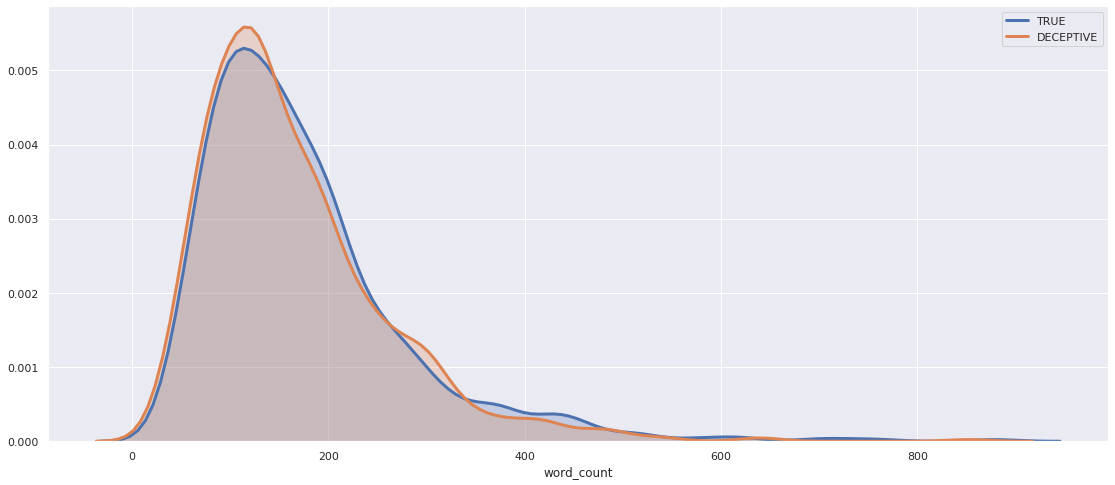

In [0]:
sns.set()
fig = plt.figure(figsize=(19, 8))
sns.distplot(df.loc[df.label== 'true', 'word_count'], hist = False, kde = True, 
             kde_kws = {'shade': True, 'linewidth': 3}, 
             label= 'TRUE')
sns.distplot(df.loc[df.label== 'deceptive', 'word_count'], hist = False, kde = True,
             kde_kws = {'shade': True, 'linewidth': 3}, 
             label= 'DECEPTIVE');

In [0]:
import string
count = lambda l1, l2: len(list(filter(lambda c: c in l2, l1)))
punc= list(set(string.punctuation))
def punc_count(row):
    return count(row, punc)

df['punc_count']= df.review.apply(punc_count)

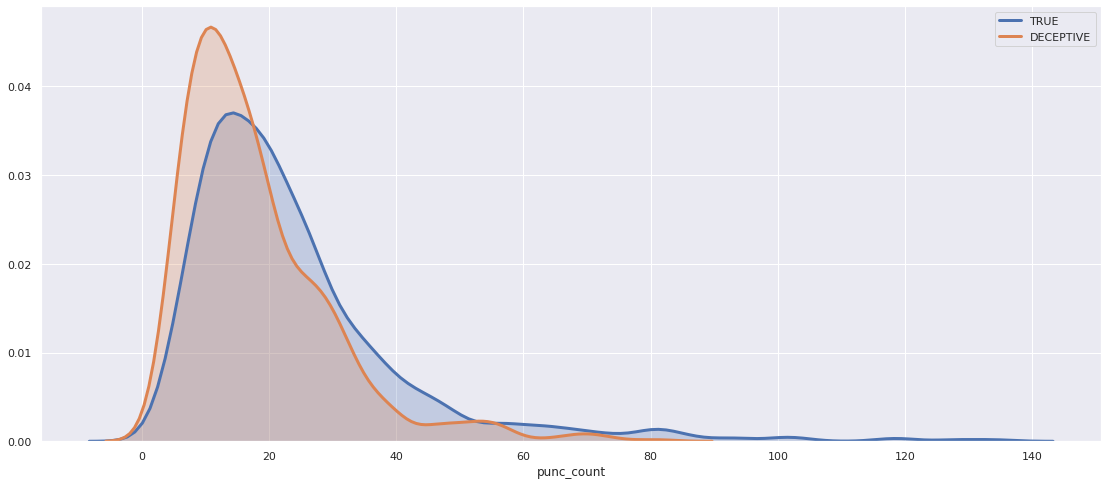

In [0]:
sns.set()
fig = plt.figure(figsize=(19, 8))
sns.distplot(df.loc[df.label== 'true', 'punc_count'], hist = False, kde = True, 
             kde_kws = {'shade': True, 'linewidth': 3}, 
             label= 'TRUE')
sns.distplot(df.loc[df.label== 'deceptive', 'punc_count'], hist = False, kde = True,
             kde_kws = {'shade': True, 'linewidth': 3}, 
             label= 'DECEPTIVE');

In [0]:
# Comapring Describe in the True and Deceptive Reviews
pd.DataFrame({'True': df[df.label == 'true']['punc_count'].describe().values, 
             'Deceptive': df[df.label == 'deceptive']['punc_count'].describe().values},
              index= df.describe().index)

,True,Deceptive
count,800.000000,800.000000
mean,23.870000,18.022500
std,17.290005,11.737833
min,1.000000,3.000000
25%,13.000000,10.000000
50%,20.000000,15.000000
75%,28.000000,24.000000
max,134.000000,81.000000


In [0]:
pd.set_option('display.max_rows', 1600)
df['hotel_name_count']= df.apply(lambda x: str(x.review).lower().count(str(x.hotel)), axis = 1)

In [0]:
df.groupby(['label', 'polarity'])['hotel_name_count'].sum()

label      polarity
deceptive  negative    426
           positive    465
true       negative    271
           positive    302
Name: hotel_name_count, dtype: int64

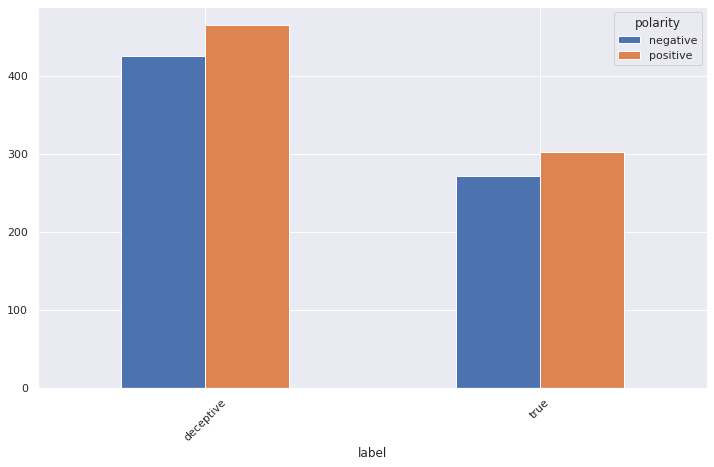

In [0]:
df.groupby(['label', 'polarity'])['hotel_name_count'].sum().unstack().plot(kind= 'bar', rot= 45, figsize= (12, 7));

Comparing Number of Unique words in reviews

In [0]:
df['unique_word_count'] = df['spacy'].apply(lambda x: len(set(list(x))))


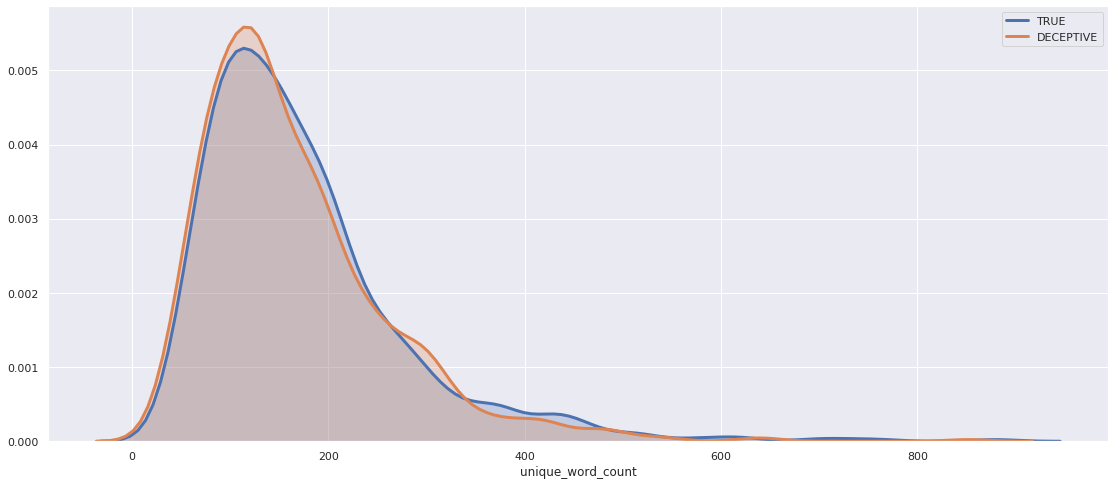

In [0]:
sns.set()
fig = plt.figure(figsize=(19,8))
sns.distplot(df.loc[df.label=='true','unique_word_count'],hist=False,kde=True,kde_kws={'shade':True,'linewidth':3},label='TRUE')
sns.distplot(df.loc[df.label=='deceptive','unique_word_count'],hist=False,kde=True,kde_kws={'shade':True,'linewidth':3},label='DECEPTIVE')

In [0]:
import string
count = lambda l1, l2: len(list(filter(lambda c: c in l2, l1)))
stop= list(nlp.Defaults.stop_words)

df['stop_count']= df.review.apply(lambda x: count(x, stop))

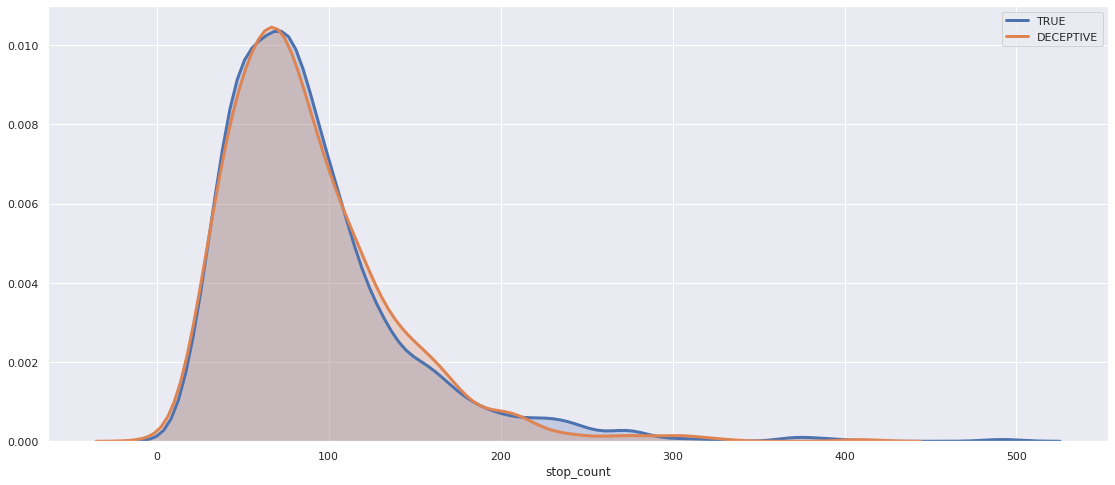

In [0]:
sns.set()
fig = plt.figure(figsize=(19, 8))
sns.distplot(df.loc[df.label== 'true', 'stop_count'], hist = False, kde = True, 
             kde_kws = {'shade': True, 'linewidth': 3}, 
             label= 'TRUE')
sns.distplot(df.loc[df.label== 'deceptive', 'stop_count'], hist = False, kde = True,
             kde_kws = {'shade': True, 'linewidth': 3}, 
             label= 'DECEPTIVE');

COUNTING POS TAGS IN REVIEWS


In [0]:
from collections import Counter
def pos_tag_count(df):
    
    # Create to empty lists in which we will store the list of POS Tags
    
    dec_pos_tags= list()
    true_pos_tags= list()
    # Iterate over Each Spacy Document Object
    
    for doc in df[df.label == 'true'].spacy:
        TAG_count = doc.count_by(spacy.attrs.TAG)
        true_dict = dict()
        
        # Spacy Returns a dictionary object with Hash Value of Pos and Counts
        # After every Iteration Update the POS Tag distioanry
        
        for key,value in sorted(TAG_count.items()):
            true_dict.update({ doc.vocab[key].text : value})
            
        # After updating the dict append it to the list we created at the very beiginning
        
        true_pos_tags.append(true_dict)
    
    # Then just follow the same above steps for the deceptive reviews as well  
    for doc in df[df.label == 'deceptive'].spacy:
        TAG_count = doc.count_by(spacy.attrs.TAG)
        dec_dict = dict()
        for key,value in sorted(TAG_count.items()):
            dec_dict.update({ doc.vocab[key].text : value})
        dec_pos_tags.append(dec_dict)
    
    '''    
    NoW the above returns a count object for each review in True and Deceptive we need to add them up
    for whole DataFrame using a counter object
    '''
    true_tag_count = Counter()
    for i in range(0,len(true_pos_tags)):
        true_tag_count = true_tag_count + Counter(true_pos_tags[i])
    dec_tag_count = Counter()
    for i in range(0,len(dec_pos_tags)):
        dec_tag_count = dec_tag_count + Counter(dec_pos_tags[i])
    true_tag_count = dict(true_tag_count)
    dec_tag_count = dict(dec_tag_count)
    
    ## Now Create a DataFrame for True Reviews with POS Tags and Counts
    true_pos = pd.DataFrame()
    true_pos['tag'] = true_tag_count.keys()
    true_pos['true_cnt'] = true_tag_count.values()
    
    ## Now Create a DataFrame for Deceptive Reviews with POS Tags and Counts
    dec_pos = pd.DataFrame()
    dec_pos['tag'] = dec_tag_count.keys()
    dec_pos['dec_cnt'] = dec_tag_count.values()
    
    # Merge these two DataFrames on Tag name
    reviews_tags = true_pos.merge(dec_pos, on='tag', how='left')
    reviews_tags = reviews_tags.set_index('tag')
    return reviews_tags

In [0]:
pos_tag_count(df).head(10)

,true_cnt,dec_cnt
tag,,
RB,9068,9003.0
NNS,4759,4006.0
IN,13483,13139.0
VBG,1690,1900.0
RBR,131,149.0
-RRB-,540,153.0
",",4566,4182.0
UH,235,149.0
VBN,2390,2286.0


POS TAGS COUNT IN POSITIVE REVIEWS

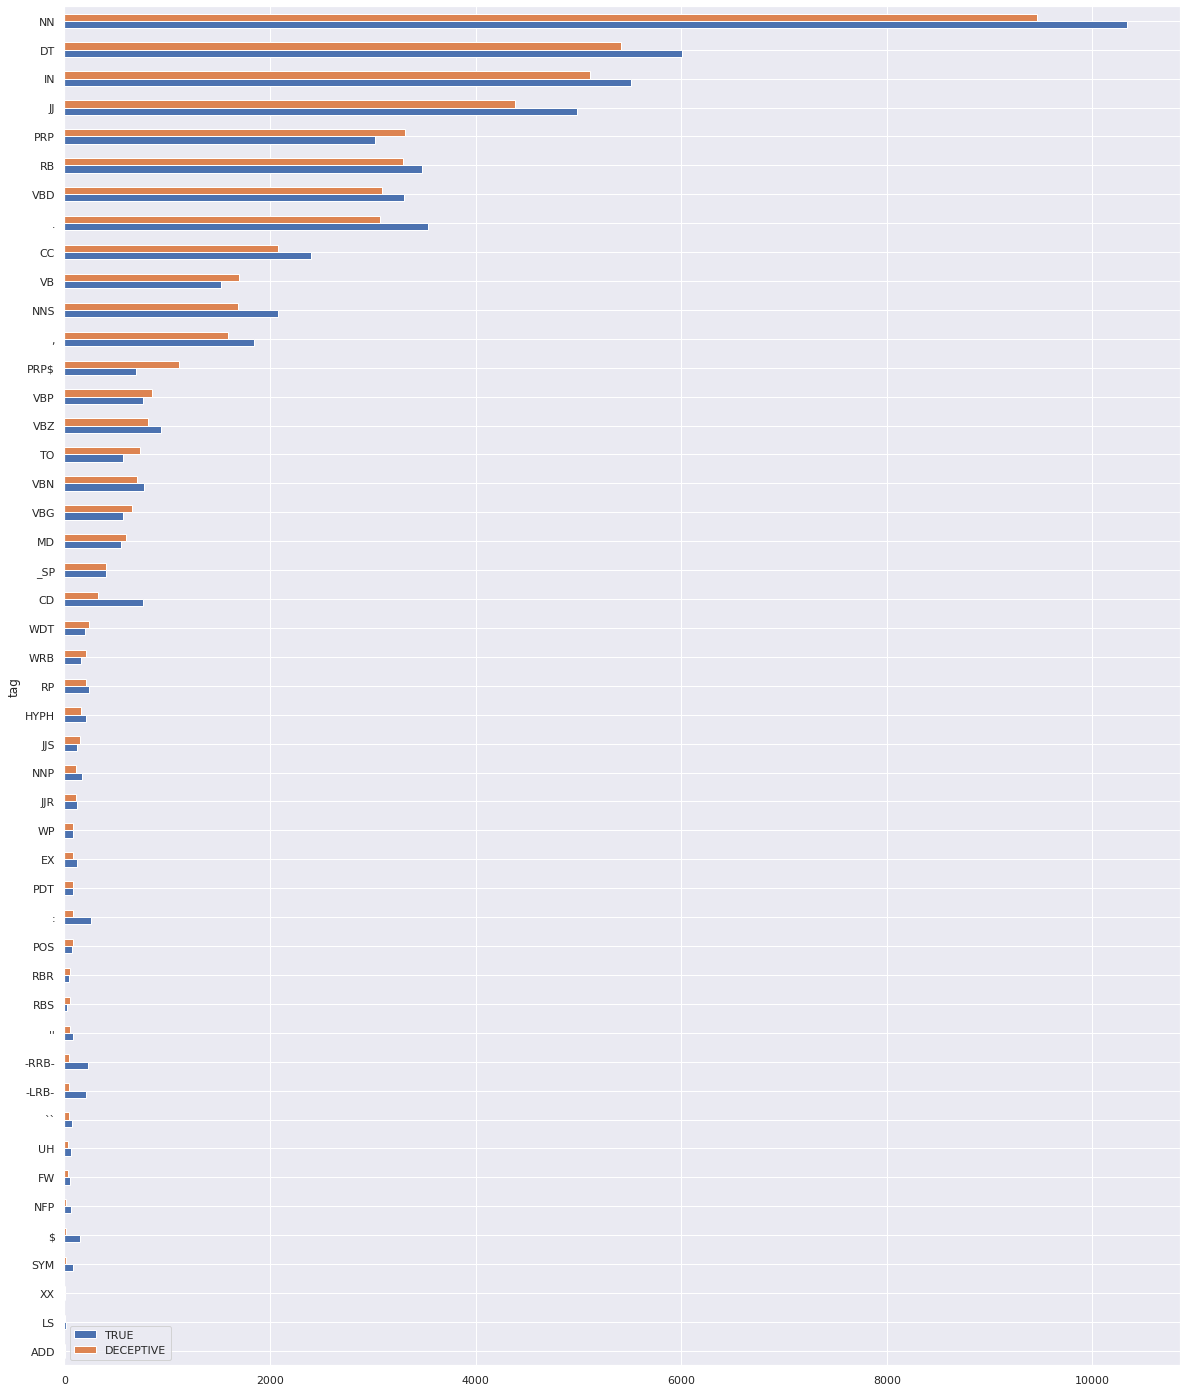

In [0]:
# POS Tags Counts in Positive Reviews
fig, ax = plt.subplots(figsize=(20, 25))
pos_tag_count(df[df.polarity == 'positive']).sort_values(by=['dec_cnt']).plot(kind= 'barh', rot=0, ax=ax);
ax.legend(['TRUE', 'DECEPTIVE']);

POS TAGS COUNTS IN NEGATIVE REVIEWS

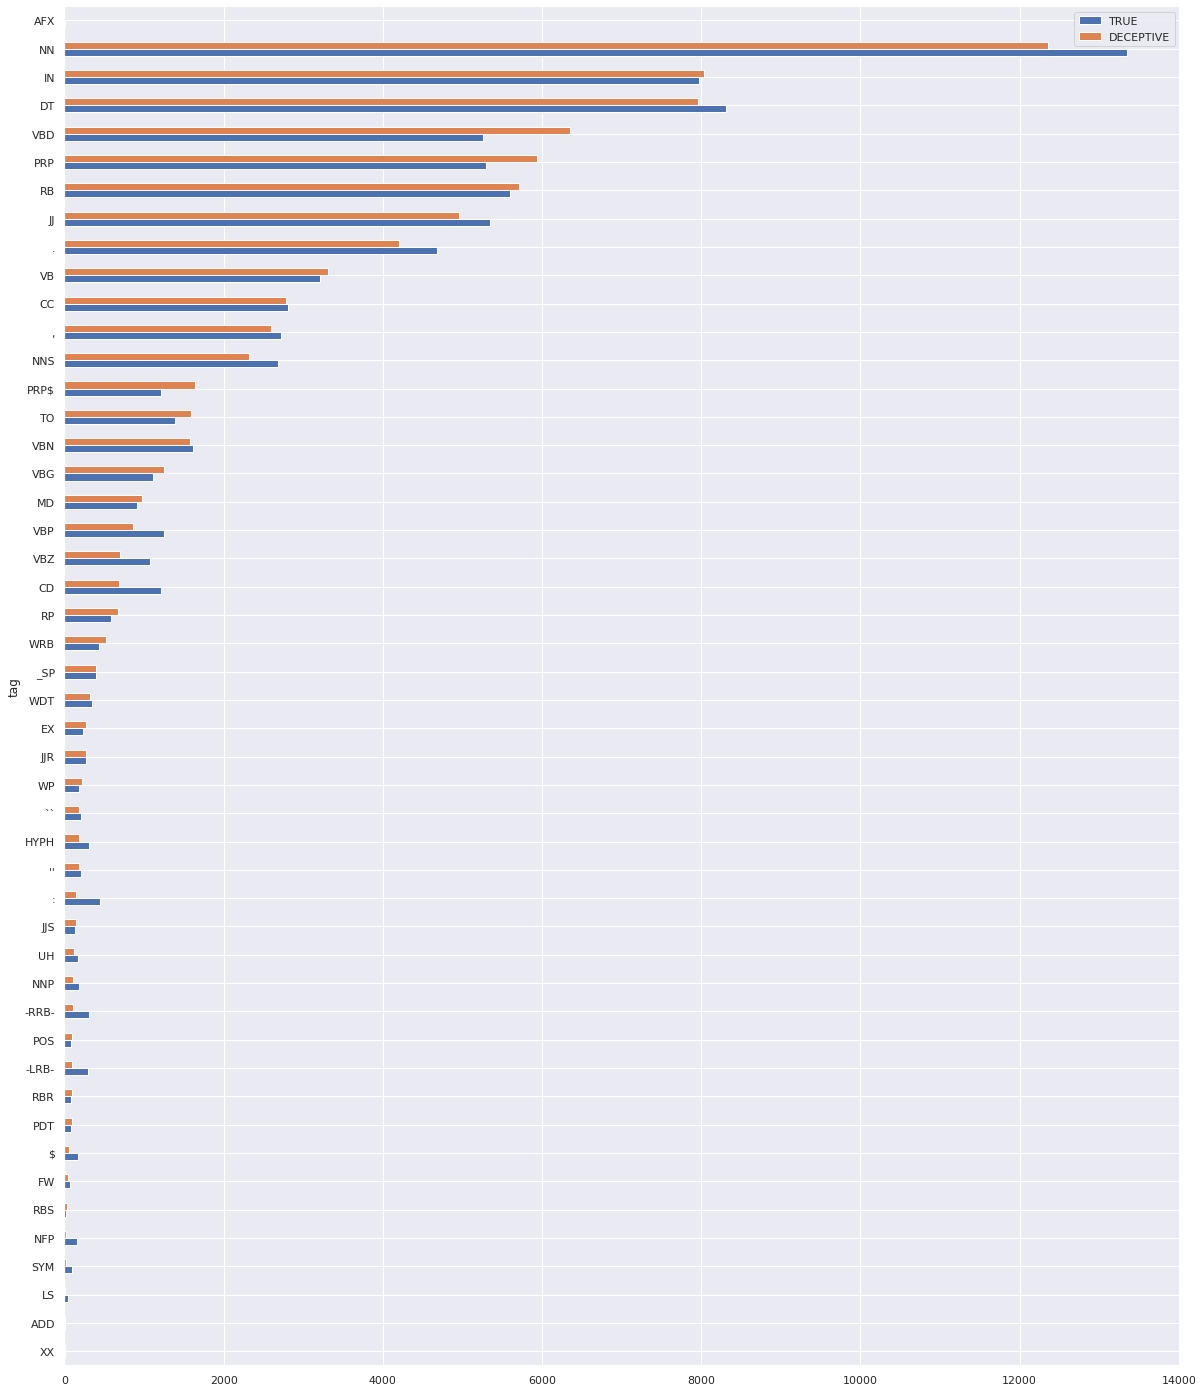

In [0]:
fig, ax = plt.subplots(figsize=(20, 25))
pos_tag_count(df[df.polarity == 'negative']).sort_values(by=['dec_cnt']).plot(kind= 'barh', rot=0, ax=ax);
ax.legend(['TRUE', 'DECEPTIVE']);

POS TAGS COMBINING POSITIVE AND NEGATIVE SENTIMENTS

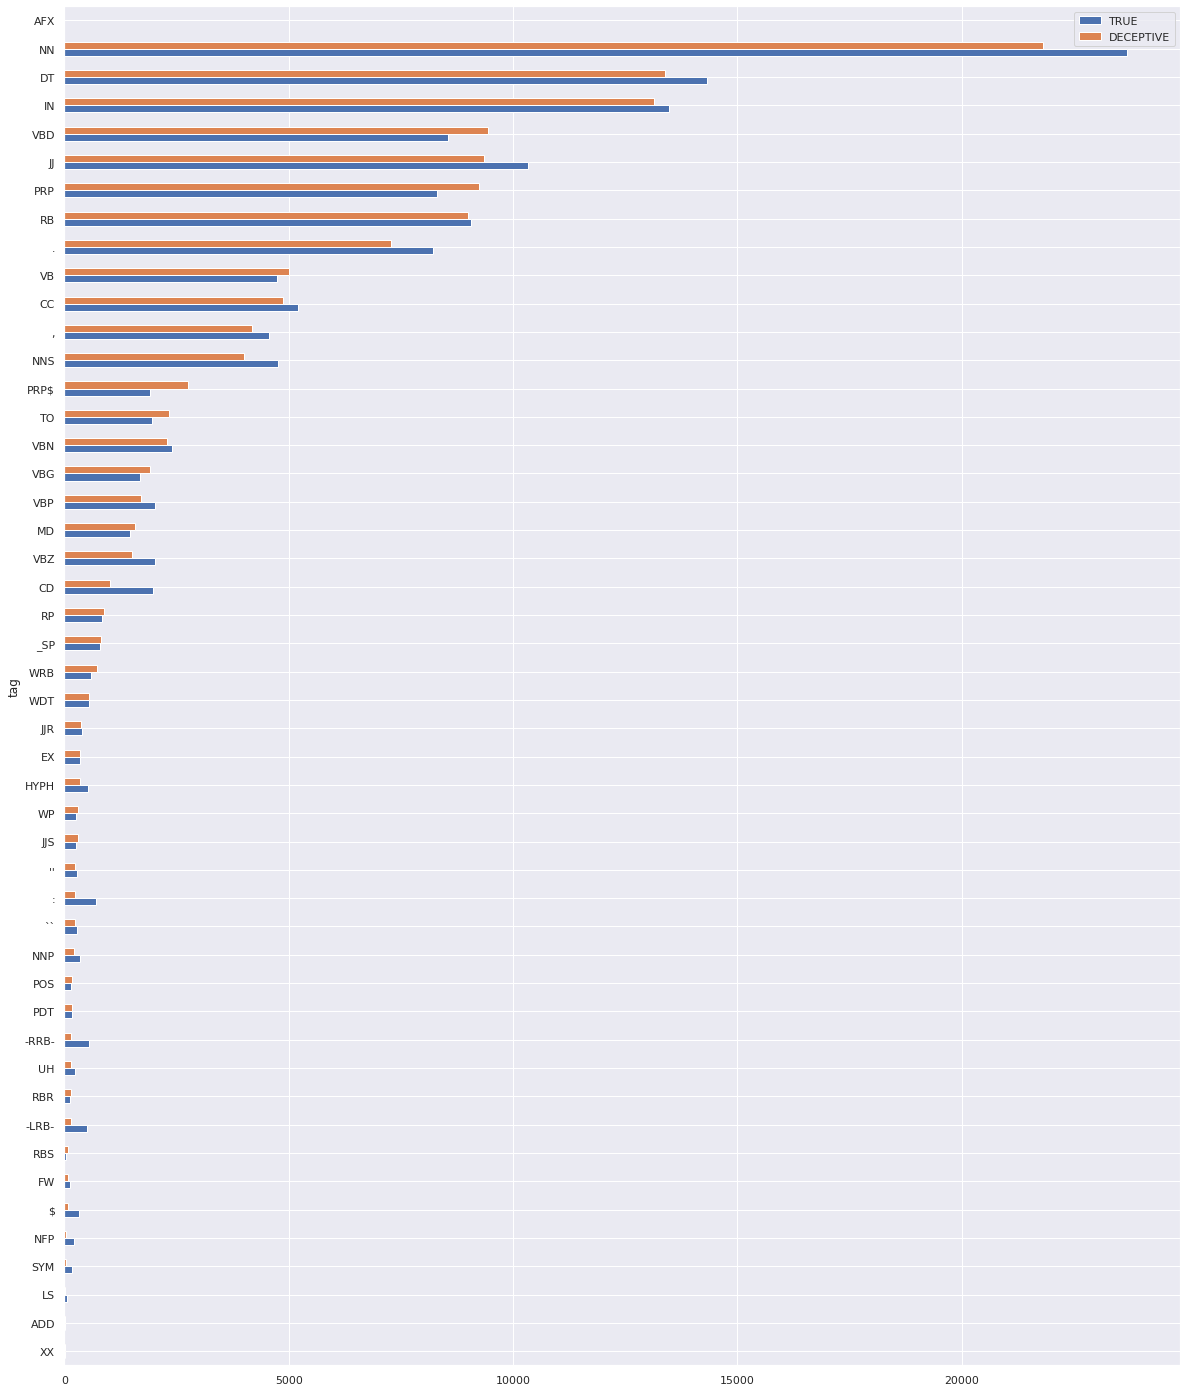

In [0]:
fig, ax = plt.subplots(figsize=(20, 25))
pos_tag_count(df).sort_values(by=['dec_cnt']).plot(kind= 'barh', rot=0, ax=ax);
ax.legend(['TRUE', 'DECEPTIVE']);

MOST FREQUENT WORDS IN THE REVIEWS

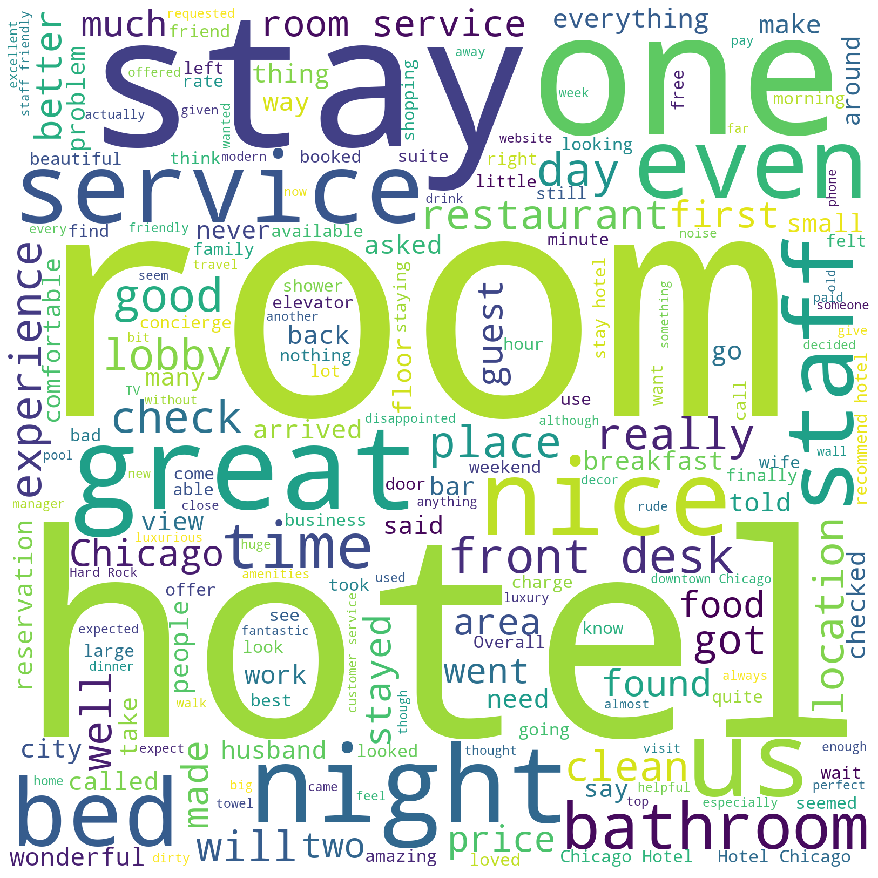

In [0]:
# Python program to generate WordCloud  
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd   
  
wordcloud = WordCloud(width = 1600, height = 1600, 
                background_color ='white',  
                min_font_size = 10).generate(".".join(df.review)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

MOST FREQUENT WORDS IN TRUE REVIEWS

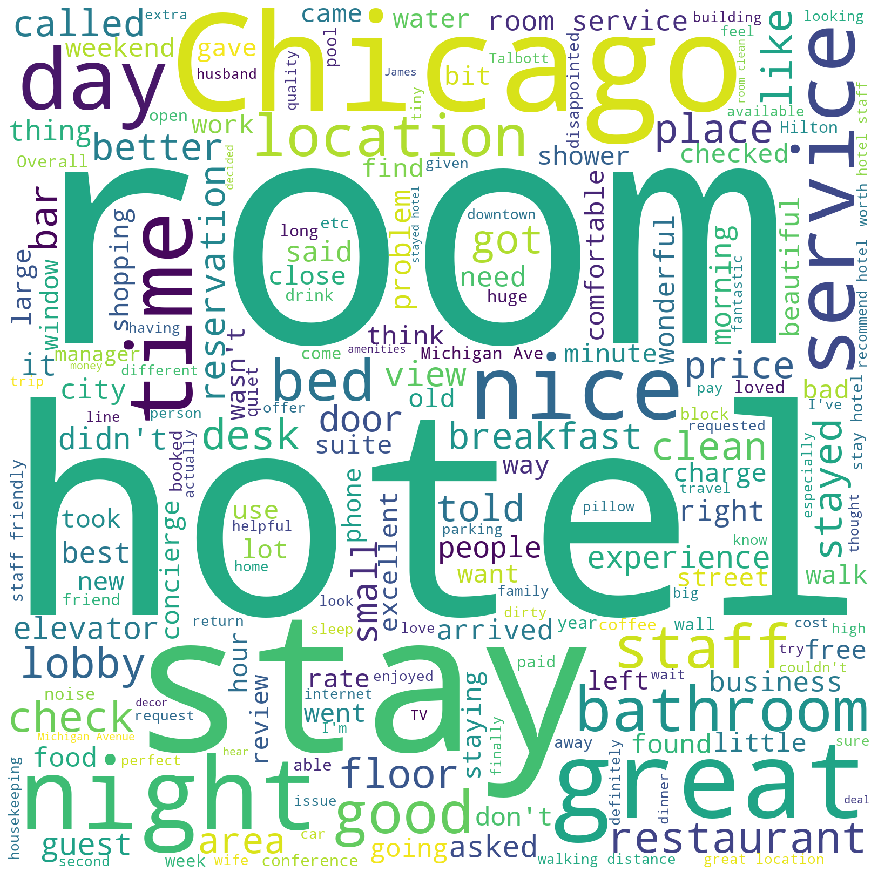

In [0]:
wordcloud = WordCloud(width = 1600, height = 1600, 
                background_color ='white',
                      stopwords= stop,
                min_font_size = 10).generate(".".join(df[df.label == 'true'].review)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

MOST FREQUENT WORDS IN DECEPTIVE REVIEWS

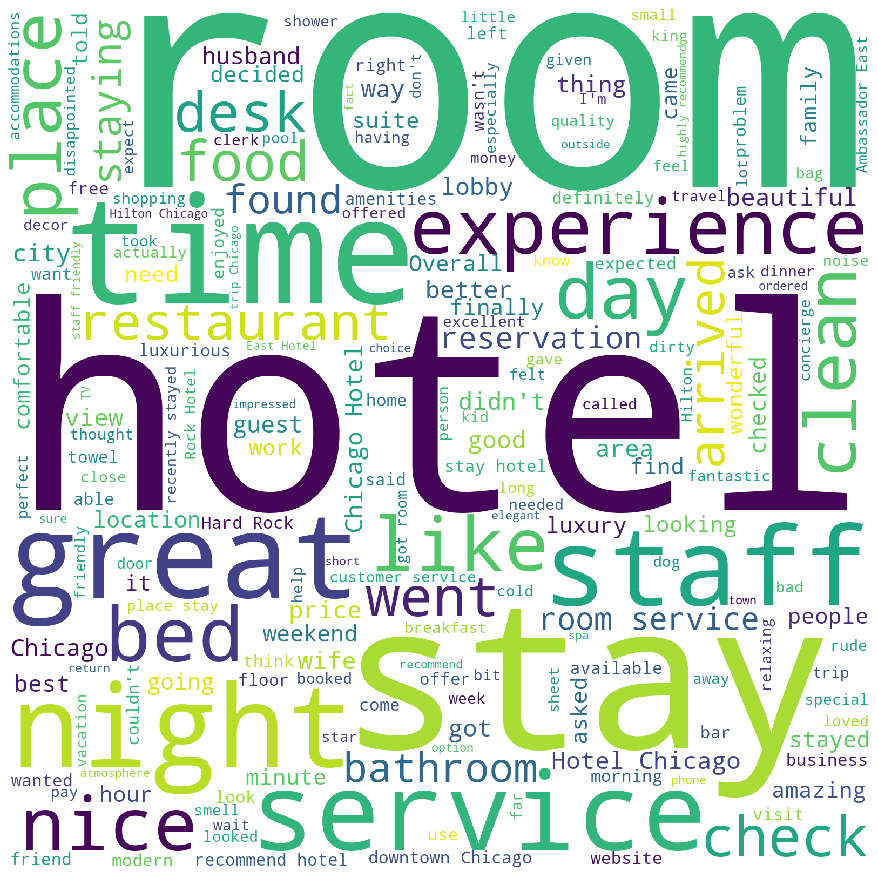

In [0]:
wordcloud = WordCloud(width = 1600, height = 1600, 
                background_color ='white',
                      stopwords= stop,
                min_font_size = 10).generate(".".join(df[df.label == 'deceptive'].review)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

CONVERTING TEXT INTO NUMBERS(FOR MACHINE INTERPRETATION)

In [0]:
X= df.review
y= df.label

TEXT PROCESSING

In [0]:
def preprocess(text):
    
    # Lower the Text
    text= text.lower()
    
    # Passing the text into SpaCy Document Object
    doc= nlp(text)
    
    # Extracting tokens out of SpaCy Document Object
    tokens= [str(t) for t in doc]
    
    # Removing the Punctuation
    tokens= [word.translate(str.maketrans('', '', string.punctuation)) for word in tokens]
    
    # remove words that contain numbers
    tokens = [word for word in tokens if not any(c.isdigit() for c in word)]
    
    # remove empty tokens
    tokens = [t for t in tokens if len(t) > 0]
    
    return tokens

TFIDF Vectorizer

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(tokenizer= preprocess, ngram_range=(1,2), max_features = 5000, lowercase=False)
tfid = tfidf_vectorizer.fit_transform(X)

In [0]:
dense = tfid.todense()
dense.shape

(1600, 5000)

In [0]:
x= pd.DataFrame(dense)

In [0]:
# x

TRAIN TEST SPLIT

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

MODEL BUILDING

In [0]:
# Fitting a simple logistic Regression Model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = lr.predict(X_test)

In [0]:
from sklearn.metrics import classification_report

In [0]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

   deceptive       0.85      0.91      0.88       194
        true       0.91      0.85      0.88       206

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



In [0]:
from sklearn.metrics import accuracy_score
print("Training Set Accuracy: ", accuracy_score(y_train, lr.predict(X_train)))
print("Test Set Accuracy: ", accuracy_score(y_test, y_pred))

Training Set Accuracy:  0.9583333333333334
Test Set Accuracy:  0.88


TUNING TFIDF VECTORIZER

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [0]:
## Create a pipeline which takes in tfidf vectoriser first and then a simple logistic Regression Model
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(tokenizer= preprocess, lowercase=False)),
    ('clf', LogisticRegression()),
])

In [0]:
## Pass in the Parameters in the pipeline 
## as these parameters belong to the tfidf in pipeline thats why you need to specify tfidf__ before the parameters
parameters = {
    'tfidf__max_df': [0.25, 0.5, 0.75],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'tfidf__max_features': [1000, 1500, 2000, 2500, 3000]
}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=5)
grid_search_tune.fit(X, y)

print("Best parameters set:")
print(grid_search_tune.best_estimator_.steps)

In [0]:
#Filtering POS TAGS
from tqdm import tqdm
#Allowed POS TAGS
allowed_pos_tags = ["PRP","JJ",,"NNP","NNS","PRP$","VBD","VB"]

SyntaxError: ignored

In [0]:
import nltk
nltk.pos_tag('we')

In [0]:
all_words = []
for p in tqdm(X):
    # Preprocessing the text
    words = preprocess(p)
    # Getting the POS tags using NLTK pos_tags function
    pos = nltk.pos_tag(words)
    #####################################################################################################
    ### POS will have list of tuples where a tuple is a combination of word and POS Tag ('we', 'PRP') ###
    #####################################################################################################
    for w in pos:
        ### w is a tuple and second element is POS Tag 
        if w[1] in allowed_word_types:
            ## W[0] is the word
            all_words.append(str(w[0]))        
pos_word_final = list(set(all_words))

In [0]:
# Now TF-IDF vectorizer will form vocabulary on these words, that will form features essentially.
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(tokenizer= preprocess, ngram_range=(1,1), vocabulary = pos_word_final)
tfid = tfidf_vectorizer.fit_transform(X)
dense = tfid.todense()
x = pd.DataFrame(dense)